# kNN - predictions and clustering

This workbook demonstrates the use of k-nearest neighbours algorithm to predict the class of a new point. In short, the algorithm works like this:
1. It divides the train data into clusters, based how far away these data points are from one another. It uses centroids to find the center of each of the clusters. 
2. For the new point which we want to classify, it calculates the distance to k-nearest neighbours and then does voting -- the predicted class is the majority class of the nearest neighboring points.

For the clustering, we do the same, but without point #2, i.e. we do not make any predictions/classifications. 

Here, I use the kNN algorithm to cluster entities.

More information is at: https://chrisalbon.com/machine_learning/feature_engineering/group_observations_using_clustering/

In [10]:
# Load libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn import neighbors
from sklearn.cluster import KMeans

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [11]:
# get the data
datasetDF = pd.read_csv('./community_smells_random.csv', sep=';')

In [12]:
datasetDF.head()

,ID,NoD,TAP,LCP,SLC,DC,SDC,BC,CC,TZ,...,NC,SCC,RCZ,RDZ,RCC,SDCC,BFN,FN,TFP,class
0,apache/mahut,44,15.95,2.2727,176.83,0.008447,0.1630,2.550000e-04,22.0,10,...,3,1289.0,396.9,6.7,132300.00,7.57,0.880,0.00733,45.19,0
1,apache/cassandra,348,7.30,0.2873,401.00,0.002180,0.1800,3.000000e-08,194.0,20,...,3,10979.0,1214.6,3510.0,8097.33,72.50,0.930,0.06600,49.70,0
2,apache/lucene-solr,181,12.83,0.5500,427.00,0.003280,0.2230,2.900000e-07,105.0,19,...,3,10116.0,164200.0,1621.0,103993.00,46.50,0.860,0.03917,47.31,1
3,apache/pig,32,23.13,3.1250,216.00,0.204000,0.2145,2.000000e-05,19.0,1,...,3,927.1,317300.0,3200.0,105766.00,5.80,0.840,0.01670,46.31,0
4,apache/jackrabbit,49,22.00,3.5600,429.56,0.130000,0.2250,6.500000e-06,29.0,1,...,3,470.0,8558.0,49.0,470.00,6.30,0.816,0.04200,33.97,1


In [13]:
# list of columns
datasetDF.columns

Index(['ID', 'NoD', 'TAP', 'LCP', 'SLC', 'DC', 'SDC', 'BC', 'CC', 'TZ', 'SCZ',
       'SDZ', 'CD', 'RCD', 'SD', 'RSD', 'ND', 'NR', 'SCR', 'RCR', 'RDC', 'NC',
       'SCC', 'RCZ', 'RDZ', 'RCC', 'SDCC', 'BFN', 'FN', 'TFP', 'class'],
      dtype='object')

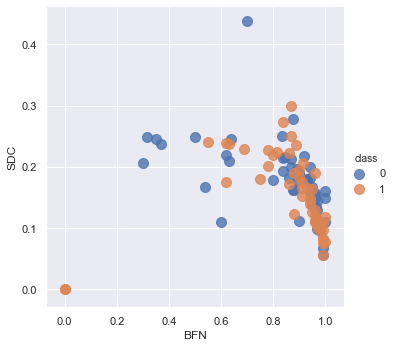

In [14]:
# plot the data to see how it is
# I only choose two columns, to make it simple
sns.lmplot('BFN', 'SDC', data=datasetDF, fit_reg=False,hue="class", scatter_kws={"marker": "D","s": 100})

## first, we use kNN to make predictions

In [15]:
# convert the data to numpy arrays as this is the input to scikit-learn
y = np.array(datasetDF['class'])


In [16]:
dataX = datasetDF.drop(['ID','class'], axis=1)
X = np.array(dataX)

In [17]:
clf = neighbors.KNeighborsClassifier(2, weights = 'uniform')
trained_model = clf.fit(X, y)

The code above is very similar to the supervised learner in the previous demo. This is intentional, because we can use the kNN algorithm to make predictions. 

To make the prediction for the new point, we can just use

new_y = clf.predict(x_new)

## This is clustering

In [18]:
# Make k-means clusterer
clusterer = KMeans(3, random_state=1)

# Fit clusterer
clusterer.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [19]:
# Predict values
datasetDF['group'] = clusterer.predict(X)

# First few observations
datasetDF.head(5)

,ID,NoD,TAP,LCP,SLC,DC,SDC,BC,CC,TZ,...,SCC,RCZ,RDZ,RCC,SDCC,BFN,FN,TFP,class,group
0,apache/mahut,44,15.95,2.2727,176.83,0.008447,0.1630,2.550000e-04,22.0,10,...,1289.0,396.9,6.7,132300.00,7.57,0.880,0.00733,45.19,0,0
1,apache/cassandra,348,7.30,0.2873,401.00,0.002180,0.1800,3.000000e-08,194.0,20,...,10979.0,1214.6,3510.0,8097.33,72.50,0.930,0.06600,49.70,0,0
2,apache/lucene-solr,181,12.83,0.5500,427.00,0.003280,0.2230,2.900000e-07,105.0,19,...,10116.0,164200.0,1621.0,103993.00,46.50,0.860,0.03917,47.31,1,2
3,apache/pig,32,23.13,3.1250,216.00,0.204000,0.2145,2.000000e-05,19.0,1,...,927.1,317300.0,3200.0,105766.00,5.80,0.840,0.01670,46.31,0,1
4,apache/jackrabbit,49,22.00,3.5600,429.56,0.130000,0.2250,6.500000e-06,29.0,1,...,470.0,8558.0,49.0,470.00,6.30,0.816,0.04200,33.97,1,0


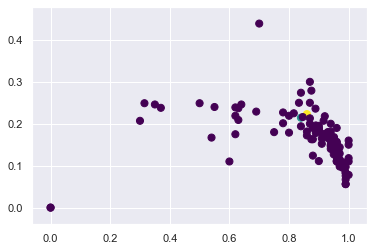

In [20]:
# plot the data to see how it is
# I only choose two columns, to make it simple
plt.scatter(datasetDF['BFN'], datasetDF['SDC'], c=datasetDF['group'], s=50, cmap='viridis')

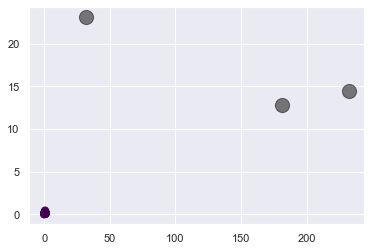

In [21]:
# plot the data to see how it is
# I only choose two columns, to make it simple
plt.scatter(datasetDF['BFN'], datasetDF['SDC'], c=datasetDF['group'], s=50, cmap='viridis')

centers = clusterer.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Visualization using t-SNE and PCA

The k-means algorithm works on data that has many parameters, which makes it hard to see. In the examples above, we chose two variables to visualize. We could have chosen to use a correlogram, but the number of features is large, so the diagram would not be readable. 

What we can do is to separate the features using algorithms like PCA and t-SNE and then visualize them. 

In [22]:
## Using t-SNE algorithm to visualize all variables at the same time
tSNE = TSNE(n_components=2)
result = tSNE.fit_transform(datasetDF.drop(['ID', 'class', 'group'], axis=1))

In [116]:
both_arr

array([], dtype=float64)

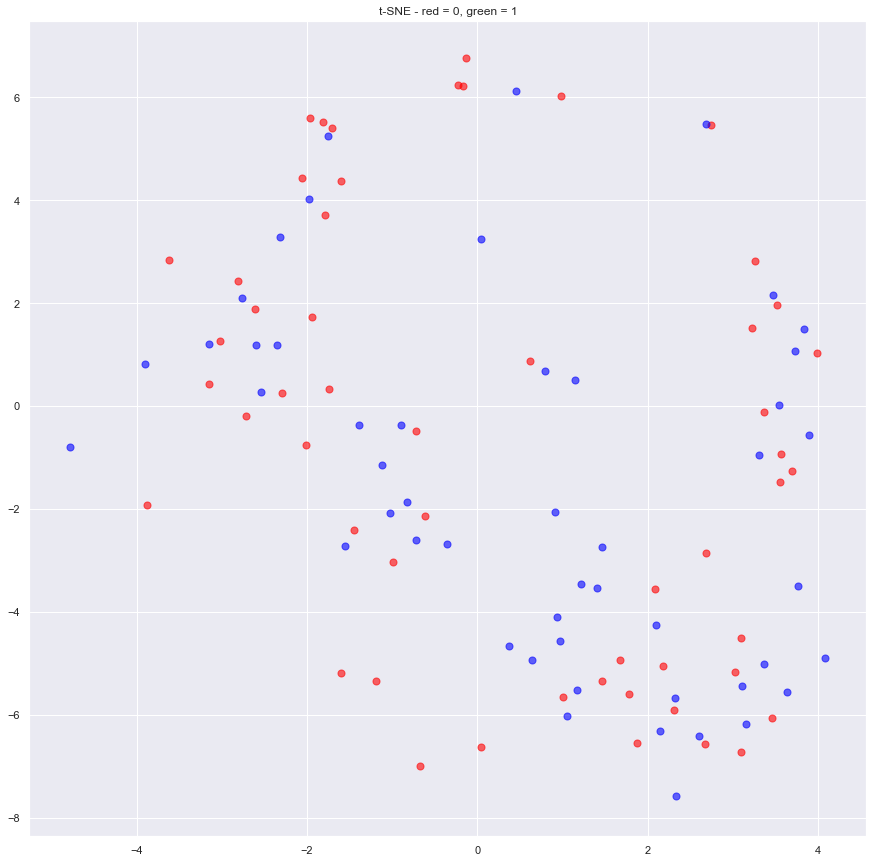

In [23]:
plt.figure(figsize=(15,15))

zero_ids = datasetDF[datasetDF['class'] == 0].index.tolist()
one_ids = datasetDF[datasetDF['class'] == 1].index.tolist()

plt.scatter(result[zero_ids, 0], result[zero_ids, 1], color='red', alpha=0.6, s=50)
plt.scatter(result[one_ids, 0], result[one_ids, 1], color='blue', alpha=0.6, s=50)

plt.title("t-SNE - red = 0, green = 1")

plt.show()
plt.close()

In [24]:
# now the same but with PCA
pca = PCA(n_components=2)
resultPCA = pca.fit_transform(datasetDF.drop(['ID', 'class', 'group'], axis=1))

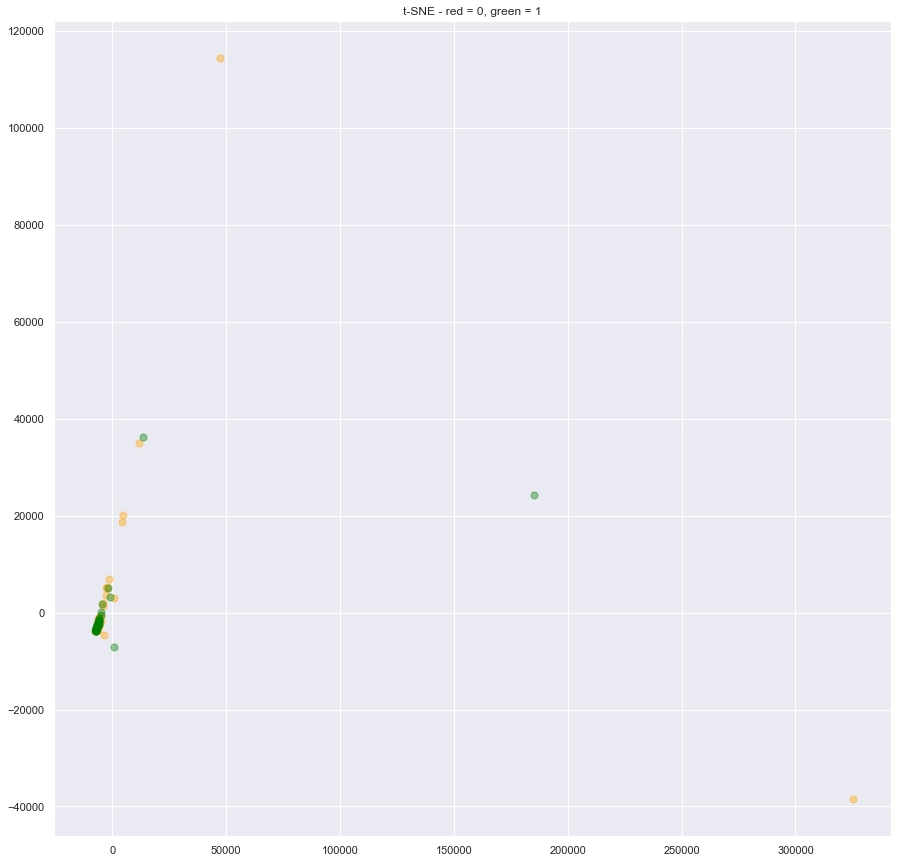

In [25]:
plt.figure(figsize=(15,15))

zero_ids = datasetDF[datasetDF['class'] == 0].index.tolist()
one_ids = datasetDF[datasetDF['class'] == 1].index.tolist()

plt.scatter(resultPCA[zero_ids, 0], resultPCA[zero_ids, 1], color='orange', alpha=0.4, s=50)
plt.scatter(resultPCA[one_ids, 0], resultPCA[one_ids, 1], color='green', alpha=0.4, s=50)

plt.title("t-SNE - red = 0, green = 1")

plt.show()
plt.close()